# Import data and libraries

In [37]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

In [38]:
# This is beacuse graph not showing in github so 
# During we work with notebook off this option 
import plotly.io as pio
pio.renderers.default = 'svg'  # or 'png'

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [40]:
from sklearn import set_config
set_config(display='diagram')

In [41]:
df = pd.read_csv('placement.csv')
df.sample(5)

,cgpa,package
162,5.53,2.55
147,5.66,2.21
161,7.30,3.33
140,7.91,3.15
30,7.36,3.26


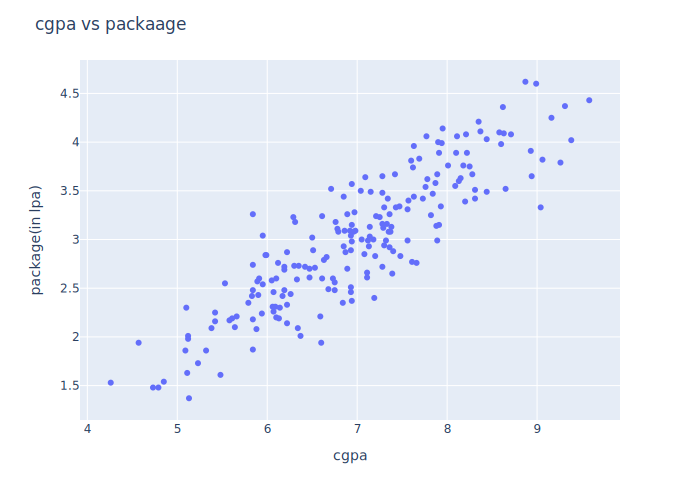

In [42]:
fig = px.scatter(
    x=df['cgpa'],
    y=df['package']
)

fig.update_layout(
    title= 'cgpa vs packaage',
    xaxis_title= 'cgpa',
    yaxis_title= 'package(in lpa)'
)
fig.show()

# Train Test Split

In [43]:
X= df.iloc[:, 0:1]
y= df.iloc[:, -1]

In [44]:
X

,cgpa
0,6.89
1,5.12
2,7.82
3,7.42
4,6.94
...,...
195,6.93
196,5.89
197,7.21
198,7.63


In [45]:
y

0      3.26
1      1.98
2      3.25
3      3.67
4      3.57
       ... 
195    2.46
196    2.57
197    3.24
198    3.96
199    2.33
Name: package, Length: 200, dtype: float64

In [46]:
X_trian, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [47]:
lr = LinearRegression()

In [48]:
lr.fit(X_trian, y_train)

LinearRegression()

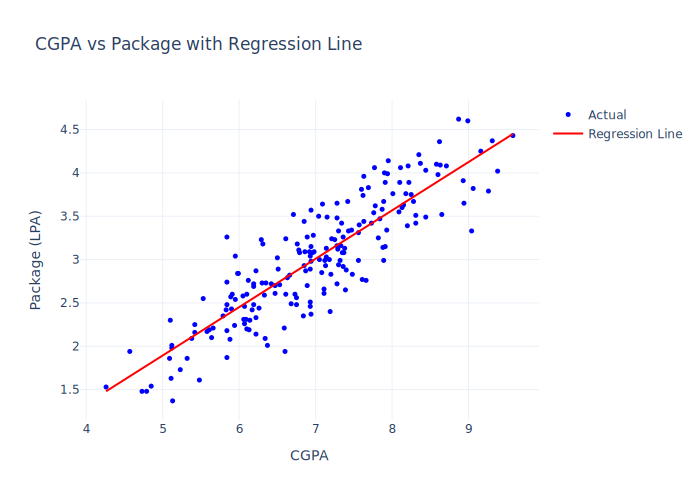

In [49]:
# Scatter plot for actual data points
scatter = go.Scatter(
    x=df['cgpa'],
    y=df['package'],
    mode='markers',
    marker=dict(size=5, color='blue'),
    name='Actual'
)

# Line plot for regression line
line = go.Scatter(
    x=X_trian.values.flatten(),  # Assuming X_train is 2D
    y=lr.predict(X_trian),
    mode='lines', 
    line=dict(color='red'),
    name='Regression Line'
)

# Combine both plots
fig = go.Figure(data=[scatter, line])


fig.update_layout(
    title='CGPA vs Package with Regression Line',
    xaxis_title='CGPA',
    yaxis_title='Package (LPA)',
    template='plotly_white'
)

fig.show()

In [50]:
y_pred = lr.predict(X_test)

In [51]:
y_pred

array([3.89111601, 3.09324469, 2.38464568, 2.57434935, 1.6537286 ,
       1.77647803, 2.07219258, 2.93143862, 3.76278706, 2.93701814,
       4.09197872, 3.51170867, 2.97049525, 2.40138424, 3.18809652,
       3.46707251, 1.94386362, 3.24389172, 2.97607477, 3.41685683,
       2.55761079, 3.16577844, 2.85890486, 3.12114229, 3.68467378,
       2.8700639 , 3.49497011, 3.34432308, 3.91901361, 1.96060218,
       3.65119666, 3.2104146 , 3.74046898, 2.7863711 , 2.78079158,
       3.27178932, 3.52844723, 2.61340599, 2.65804215, 2.71383735])

In [52]:
y_pred.shape

(40,)

In [53]:
print(f"R^2 Score {r2_score(y_test, y_pred)} \n")
print(f"MSE: {mean_absolute_error(y_test, y_pred)} \n")
print(f"RMSE: {np.sqrt(mean_absolute_error(y_test, y_pred))} \n")

R^2 Score 0.780730147510384 

MSE: 0.2884710931878175 

RMSE: 0.5370950504220063 

